<a href="https://colab.research.google.com/github/changsin/CV/blob/main/2.05.image_filtering_convolution_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.05 Image filtering: convolution: 2D

The following are exercises done for Hany Faird's [Computer Vision course](https://youtube.com/playlist?list=PLhwIOYE-ldwL6h-peJADfNm8bbO3GlKEy&si=sXmtTvaJDQb6QD20)

## 2.05.1 kernels

### Horizontal gradient (Sobel X): detects vertical edges
$$
G_x =
\begin{bmatrix}
-0.125 & 0 & 0.125 \\
-0.250 & 0 & 0.250 \\
-0.125 & 0 & 0.125 \\
\end{bmatrix}
$$

### Vertical gradient (Sobel Y): detects horizontal edges
$$
G_y =
\begin{bmatrix}
-0.125 & -0.250 & -0.125 \\
0 & 0 & 0 \\
0.125 & 0.250 & 0.125 \\
\end{bmatrix}
$$

### Edge detection:
$$
G = \sqrt{G_x^2 + G_y^2}
$$


### Converting to a greyscale image

1. Average method:
$
I_{gray}​=\frac{R + G + B}{3}
$

2. Luminosity method:
$
I_{gray}​=0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B
$

## 2.05.2 [Image filtering: convolution: convolution, 2-D](https://www.youtube.com/watch?v=4Y_iestloSk&list=PLhwIOYE-ldwL6h-peJADfNm8bbO3GlKEy&index=21).

Write some code to compute the image gradient:
$
\sqrt{f^2_x + f^2_y}
$
See scipy.ndimage.convolve

(296, 292, 4)
(3, 3)
Grayscale image shape: (296, 292)


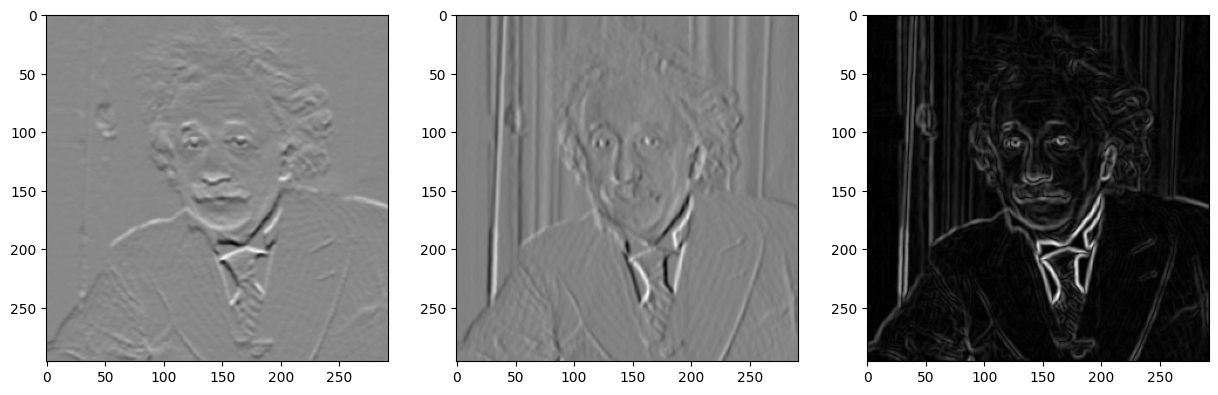

In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

img = 1.0 * plt.imread("/content/alt.png") # convert to double
filt = np.array([[-0.1250,-0.2500,-0.1250],
                 [0,0,0],
                  [0.1250,0.2500,0.1250]])
print(img.shape)
print(filt.shape)

# Combine the RGB channels and discard Alpha
img_gray = np.mean(img[..., :3], axis=-1)  # Combine R, G, B into grayscale
print("Grayscale image shape:", img_gray.shape)

img_y = ndimage.convolve(img_gray, filt, mode="reflect")
img_x = ndimage.convolve(img_gray, filt.T, mode="reflect")
img_g = np.sqrt(img_x**2 + img_y**2)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img_y, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img_x, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img_g, cmap='gray')